<a href="https://colab.research.google.com/github/TRAGIC11/Car_Price_Prediction_using_Lasso_Regression/blob/main/Car_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MOUNTING GOOGLE DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


 **DOWNLOADING DATA TO YOUR DRIVE**

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/kaggle"
%cd /content/gdrive/My Drive/kaggle
!kaggle datasets download -d nehalbirla/vehicle-dataset-from-cardekho

/content/gdrive/My Drive/kaggle
  0% 0.00/227k [00:00<?, ?B/s]
100% 227k/227k [00:00<00:00, 14.8MB/s]


**UNZIPPING DATA**

In [ ]:
!ls
!unzip \*.zip  && rm *.zip

'car data.csv'			   kaggle.json
'CAR DETAILS FROM CAR DEKHO.csv'   vehicle-dataset-from-cardekho.zip
'Car details v3.csv'
Archive:  vehicle-dataset-from-cardekho.zip
replace CAR DETAILS FROM CAR DEKHO.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: CAR DETAILS FROM CAR DEKHO.csv  
  inflating: Car details v3.csv      
  inflating: car data.csv            


**Importing the Dependencies**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

**DATA COLLECTION AND PROCESSING**

In [ ]:
#loading the data file from csv using Pandas Library
car_dataset = pd.read_csv('car data.csv')

In [ ]:
#inspecting data frame
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
#number of data points (rows and colunmns)
car_dataset.shape

(301, 9)

In [ ]:
#get some information about our dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
#checking number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

No Null Data

In [ ]:
#Checking distribution of Categorical Data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


**Let's Convert String Data to Numerical Value**

> like Petrol = 0, Diesel = 1, CNG = 2



In [ ]:
car_dataset["Is_Petrol"] = car_dataset["Fuel_Type"] == "Petrol"
car_dataset["Is_Diesel"] = car_dataset["Fuel_Type"] == "Diesel"
car_dataset["Is_CNG"] = car_dataset["Fuel_Type"] == "CNG"

car_dataset["Is_Petrol"] = car_dataset["Is_Petrol"]*1
car_dataset["Is_Diesel"] = car_dataset["Is_Diesel"]*1
car_dataset["Is_CNG"] = car_dataset["Is_CNG"]*1

#car_dataset.replace({'Fuel_Type':{"Petrol":'0',"Diesel":'1',"CNG":'2'}}, inplace=True )
car_dataset.replace({'Seller_Type':{"Dealer":'0',"Individual":'1'}}, inplace=True )
car_dataset.replace({'Transmission':{"Manual":'0',"Automatic":'1'}}, inplace=True )

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Is_Petrol,Is_Diesel,Is_CNG
0,ritz,2014,3.35,5.59,27000,Petrol,0,0,0,1,0,0
1,sx4,2013,4.75,9.54,43000,Diesel,0,0,0,0,1,0
2,ciaz,2017,7.25,9.85,6900,Petrol,0,0,0,1,0,0
3,wagon r,2011,2.85,4.15,5200,Petrol,0,0,0,1,0,0
4,swift,2014,4.60,6.87,42450,Diesel,0,0,0,0,1,0


In [ ]:
car_dataset = car_dataset.drop(["Fuel_Type"],axis=1)
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Is_Petrol,Is_Diesel,Is_CNG
0,ritz,2014,3.35,5.59,27000,0,0,0,1,0,0
1,sx4,2013,4.75,9.54,43000,0,0,0,0,1,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,1,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,1,0,0
4,swift,2014,4.60,6.87,42450,0,0,0,0,1,0


**Spliting Data** into training data and test data

In [ ]:
X = car_dataset.drop(["Car_Name","Selling_Price"],axis = 1)
Y = car_dataset['Selling_Price']

In [ ]:
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  ... Is_Petrol Is_Diesel  Is_CNG
0    2014           5.59       27000  ...         1         0       0
1    2013           9.54       43000  ...         0         1       0
2    2017           9.85        6900  ...         1         0       0
3    2011           4.15        5200  ...         1         0       0
4    2014           6.87       42450  ...         0         1       0
..    ...            ...         ...  ...       ...       ...     ...
296  2016          11.60       33988  ...         0         1       0
297  2015           5.90       60000  ...         1         0       0
298  2009          11.00       87934  ...         1         0       0
299  2017          12.50        9000  ...         0         1       0
300  2016           5.90        5464  ...         1         0       0

[301 rows x 9 columns]
0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300   

**Splitting Training and Test Data**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 9)

Model Training

# Linear Regression
Loading linear regression model

In [ ]:
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Training done, now test it

In [ ]:
#prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
#Error Metric as R-Square Error
error_score = metrics.r2_score(training_data_prediction,Y_train)
print(f"R Squared Error: {error_score}")

R Squared Error: 0.8795000347358122


Let's Visualise our Predictions

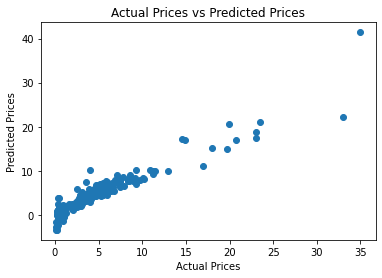

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

**Now let's test it on Test Data**

R Squared Error: 0.8406792679077706


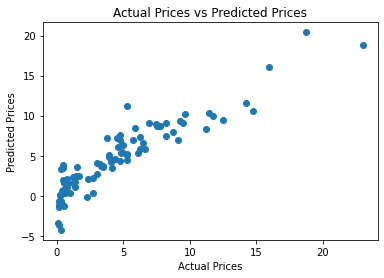

In [ ]:
test_data_prediction = lin_reg_model.predict(X_test)
error_score = metrics.r2_score(test_data_prediction,Y_test)
print(f"R Squared Error: {error_score}")
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

# Lasso Regression

In [ ]:
las_reg_model = Lasso()
las_reg_model.fit(X_train,Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
training_data_prediction = las_reg_model.predict(X_train)

In [ ]:
error_score = metrics.r2_score(training_data_prediction,Y_train)
print(f"R Squared Error: {error_score}")

R Squared Error: 0.8103104765416159


Let's Visualise

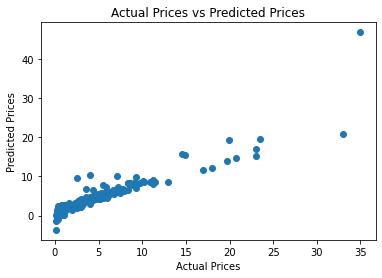

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Let's try it on Test Data

R Squared Error: 0.7669318245049099


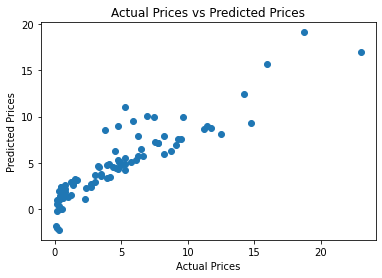

In [ ]:
test_data_prediction = las_reg_model.predict(X_test)
error_score = metrics.r2_score(test_data_prediction,Y_test)
print(f"R Squared Error: {error_score}")
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()